In [1]:
# Lectures 1-7 were basic theory introduction

In [2]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [3]:
env = gym.make("FrozenLake-v1")

In [4]:
action_space_size = env.action_space.n
state_space_size  = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate       = 1
max_exploration_rate   = 1
min_exploration_rate   = 0.01
exploration_decay_rate = 0.001

In [6]:
# -------------------9-----------------------------------

In [7]:
rewards_all_episodes = []

# Q-Learning Algorithm
for episode in range(num_episodes):
    state = env.reset()
    done  = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        # Exploration-Exploitation Tradeoff         
        exploration_rate_threshold = random.uniform(0, 1)
        if(exploration_rate_threshold > exploration_rate):
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + \
                                 learning_rate       * (reward + (discount_rate * np.max(q_table[new_state, :])))
            
        state = new_state
        rewards_current_episode += reward
        
        if (done == True):
            break
    
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards_all_episodes.append(rewards_current_episode)
    

rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
print("***************************Average reward per thousand episodes ************************************\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Print updated Q-table
print("\n\n*****************Q-table***********************\n")
print(q_table)
    

***************************Average reward per thousand episodes ************************************

1000 :  0.028000000000000018
2000 :  0.18300000000000013
3000 :  0.4040000000000003
4000 :  0.5230000000000004
5000 :  0.6370000000000005
6000 :  0.6630000000000005
7000 :  0.6830000000000005
8000 :  0.6680000000000005
9000 :  0.6850000000000005
10000 :  0.6540000000000005


*****************Q-table***********************

[[0.56020421 0.46417474 0.46117278 0.4599673 ]
 [0.37526776 0.30418925 0.30202992 0.47812383]
 [0.41176516 0.39491334 0.42618402 0.43456221]
 [0.32590679 0.32229514 0.27062404 0.41995171]
 [0.57607616 0.37651799 0.3653531  0.45776224]
 [0.         0.         0.         0.        ]
 [0.22769486 0.15109438 0.21030526 0.14018937]
 [0.         0.         0.         0.        ]
 [0.48384071 0.48237561 0.35371703 0.61191548]
 [0.33450759 0.64911    0.50217564 0.33893218]
 [0.58313002 0.42525792 0.43205924 0.41218866]
 [0.         0.         0.         0.        ]
 [0.     

In [8]:
# -------------------------10--------------------------------------------

In [9]:
# Playing the game after training
for episode in range(3):
    state = env.reset()
    done  = False
    print("*************EPISODE ", episode + 1, "*********************\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait = True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state, :])
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1 :
                print("******You reached the goal !!! *************")
                time.sleep(3)
            else:
                print("******You fell through a hole ! ************")
                time.sleep(3)
                
            clear_output(wait=True)
            break
        
        state = new_state

env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
******You reached the goal !!! *************


In [10]:
# 11 - 15 were introductory lectures on deep Q networks

/home/arjunv/miniconda3/envs/pyt2/lib/python3.8/site-packages/gym/envs/classic_control/cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


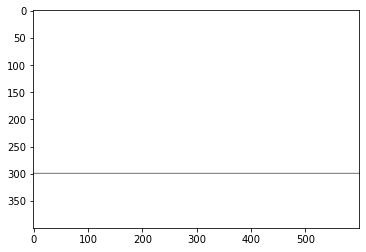

In [1]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')
render = lambda : plt.imshow(env.render(mode='rgb_array'))
# env.reset()
# render()
env.reset()
for _ in range(1000):
    render()
    env.step(env.action_space.sample())
env.close()

In [1]:
import gym
env = gym.make('CartPole-v0')
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

env.close()

/home/arjunv/miniconda3/envs/pyt2/lib/python3.8/site-packages/gym/envs/classic_control/cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


In [24]:
# ----------------- 16 -----------------------------------

In [1]:
%matplotlib inline
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [2]:
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython : from IPython import display

In [3]:
# Deep Q-Network
class DQN(nn.Module):
    def __init__(self, image_height, image_width):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features = image_height * image_width * 3, out_features = 24)
        self.fc2 = nn.Linear(in_features = 24, out_features = 32)
        self.out = nn.Linear(in_features = 32, out_features = 2)
        
    def forward(self, t):
        t = t.flatten(start_dim = 1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t

In [4]:
# Experience Class
Experience = namedtuple('Experience', ('state', 'action', 'next_state', 'reward'))

In [5]:
e = Experience(2, 3, 1, 4)
e

Experience(state=2, action=3, next_state=1, reward=4)

In [6]:
# Replay Memory Class
class ReplayMemory():
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.push_count = 0
    
    def push(self, experience):
        if(len(self.memory) < self.capacity):
            self.memory.append(experience)
        else:
            self.memory[self.push_count % self.capacity] = experience
        self.push_count += 1
    
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def can_provide_sample(self, batch_size):
        return len(self.memory) >= batch_size

In [7]:
# Epsilon Greedy Strategy
class EpsilonGreedyStrategy():
    def __init__(self, start, end, decay):
        self.start = start
        self.end   = end
        self.decay = decay
    
    def get_exploration_rate(self, current_step):
        return (self.end + (self.end - self.start) * math.exp(-1 * current_step * self.decay))

In [8]:
# Reinforcement Learning Agent
class Agent():
    def __init__(self, strategy, num_actions, device):
        self.current_step = 0
        self.strategy     = strategy
        self.num_actions  = num_actions
        self.device = device
    
    def select_action(self, state, policy_net):
        rate = self.strategy.get_exploration_rate(self.current_step)
        self.current_step += 1
        
        if(rate > random.random()):
            # explore
            action = random.randrange(self.num_actions)
            return torch.tensor([action]).to(device)
        else:
            with torch.no_grad():
                # exploit                
                return policy_net(state).argmax(dim = 1).to(device)
        

In [9]:
# ----------------- 17 -----------------------------------------------

In [10]:
# CartPole Environment Manager
class CartPoleEnvManager():
    def __init__(self, device):
        self.device = device
        self.env    = gym.make('CartPole-v0').unwrapped
        self.env.reset()
        self.current_screen = None
        self.done = False
        
    def reset(self):
        self.env.reset()
        self.current_screen = None
        
    def close(self):
        self.env.close()
    
    def render(self, mode = 'human'):
        return self.env.render(mode)
    
    def num_actions_available(self):
        return self.env.action_space.n
    
    def take_action(self, action):
        _ , reward, self.done, _ = self.env.step(action.item())
        return torch.tensor([reward], device = self.device)
    
    def just_starting(self):
        return self.current_screen is None
    
    def get_state(self):
        if self.just_starting() or self.done :
            self.current_screen = self.get_processed_screen()
            black_screen = torch.zeros_like(self.current_screen)
            
            return black_screen
        else:
            s1 = self.current_screen
            s2 = self.get_processed_screen()
            self.current_screen = s2
            return s2 - s1
    
    def get_screen_height(self):
        screen = self.get_processed_screen()
        return screen.shape[2]
    
    def get_screen_width(self):
        screen = self.get_processed_screen()
        return screen.shape[3]
    
    def get_processed_screen(self):
        screen = self.render('rgb_array').transpose((2, 0, 1))
        screen = self.crop_screen(screen)
        return self.transform_screen_data(screen)
    
    def crop_screen(self, screen):
        screen_height = screen.shape[1]
            
        # Strip off top and bottom
        top    = int(screen_height * 0.4)
        bottom = int(screen_height * 0.8)
        screen = screen[:, top:bottom, :]
        return screen
    
    def transform_screen_data(self, screen):
        
        #Convert to float, rescale, convert to tensor
        screen = np.ascontiguousarray(screen, dtype = np.float32) / 255
        screen = torch.from_numpy(screen)
        
        #Use torchvision for transformations
        resize = T.Compose([T.ToPILImage(), T.Resize((40, 90)), T.ToTensor()])
        
        return resize(screen).unsqueeze(0).to(self.device)

In [11]:
# Examples

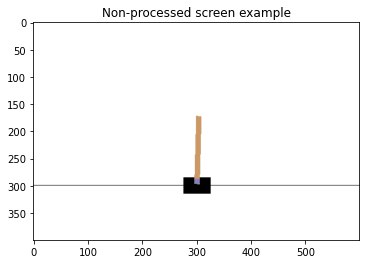

In [12]:
# Non-Processed Screen

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
em = CartPoleEnvManager(device)
em.reset()

screen = em.render('rgb_array')

plt.figure()
plt.imshow(screen)
plt.title('Non-processed screen example')
plt.show()


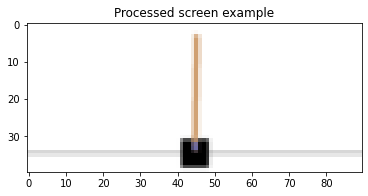

In [13]:
# Processed Screen

screen = em.get_processed_screen()

plt.figure()
screen = torch.Tensor.cpu(screen)
plt.imshow(screen.squeeze(0).permute(1, 2, 0), interpolation = 'none')
plt.title('Processed screen example')
plt.show()

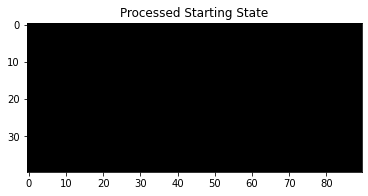

In [14]:
# Starting State

screen = em.get_state()

plt.figure()
screen = torch.Tensor.cpu(screen)
plt.imshow(screen.squeeze(0).permute(1, 2, 0), interpolation = 'none')
plt.title('Processed Starting State')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


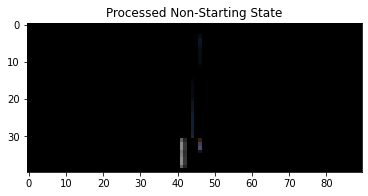

In [15]:
# Non-Starting State

for i in range(5):
    em.take_action(torch.tensor([1]))

screen = em.get_state()

plt.figure()
screen = torch.Tensor.cpu(screen)
plt.imshow(screen.squeeze(0).permute(1, 2, 0), interpolation = 'none')
plt.title('Processed Non-Starting State')
plt.show()

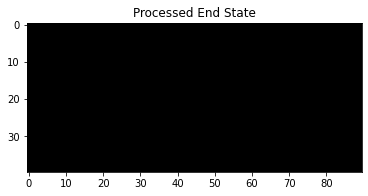

In [16]:
# End-State

em.done = True
screen = em.get_state()

plt.figure()
screen = torch.Tensor.cpu(screen)
plt.imshow(screen.squeeze(0).permute(1, 2, 0), interpolation = 'none')
plt.title('Processed End State')
plt.show()

In [25]:
def plot(values, moving_avg_period):
    plt.figure(2)
    plt.clf()
    plt.title('Training ...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(values)
    
    moving_avg = get_moving_average(moving_avg_period, values)
    plt.plot(moving_avg)
    plt.pause(0.001)
    print("Episode", len(values), "\n", moving_avg_period, "episode moving avg:", moving_avg[-1])
    if is_ipython: display.clear_output(wait = True)

def get_moving_average(period, values):
    values = torch.tensor(values, dtype = torch.float)
    
    if(len(values) >= period):
        moving_avg = values.unfold(dimension = 0, size = period, step = 1).mean(dim = 1).flatten(start_dim = 0)
        moving_avg = torch.cat((torch.zeros(period - 1), moving_avg))
        return moving_avg.numpy()
    
    else:
        moving_avg = torch.zeros(len(values))
        return moving_avg.numpy()
    

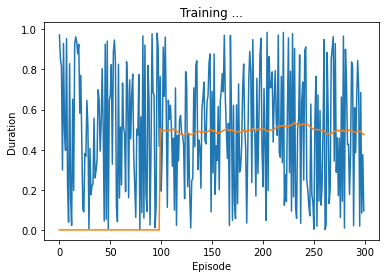

Episode 300 
 100 episode moving avg: 0.475519


In [26]:
plot(np.random.rand(300), 100)

In [19]:
# --------------19------------------------------------------------

In [20]:
def extract_tensors(experiences):
    
    batch = Experience(*zip(*experiences))
    
    t1 = torch.cat(batch.state)
    t2 = torch.cat(batch.action)
    t3 = torch.cat(batch.reward)
    t4 = torch.cat(batch.next_state)
    
    return (t1, t2, t3, t4)

In [27]:
class QValues():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    @staticmethod
    def get_current(policy_net, states, actions):
        return policy_net(states).gather(dim = 1, index = actions.unsqueeze(-1))
    
    @staticmethod
    def get_next(target_net, next_states):
        # get all black screens         
        final_state_locations = next_states.flatten(start_dim = 1).max(dim = 1)[0].eq(0).type(torch.bool)
        non_final_state_locations = (final_state_locations == False)
        non_final_states = next_states[non_final_state_locations]
        batch_size = next_states.shape[0]
        values = torch.zeros(batch_size).to(QValues.device)
        values[non_final_state_locations] = target_net(non_final_states).max(dim = 1)[0].detach()
        return values

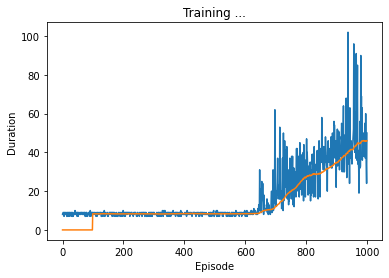

Episode 1000 
 100 episode moving avg: 45.97


In [28]:
# Main Program

batch_size = 256
gamma = 0.999
eps_start = 1
eps_end = 0.01
eps_decay = 0.001
target_update = 10
memory_size = 100000
lr = .001
num_episodes = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
em = CartPoleEnvManager(device)
strategy = EpsilonGreedyStrategy(eps_start, eps_end, eps_decay)
agent = Agent(strategy, em.num_actions_available(), device)
memory = ReplayMemory(memory_size)

policy_net = DQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net = DQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer  = optim.Adam(params = policy_net.parameters(), lr = lr) 

episode_durations = []
for episode in range(num_episodes):
    em.reset()
    state = em.get_state()
    
    for timestep in count():
        action = agent.select_action(state, policy_net)
        reward = em.take_action(action)
        next_state = em.get_state()
        memory.push(Experience(state, action, next_state, reward))
        state = next_state
        
        if memory.can_provide_sample(batch_size):
            experiences = memory.sample(batch_size)
            states, actions, rewards, next_states = extract_tensors(experiences)
            
            current_q_values = QValues.get_current(policy_net, states, actions)
            next_q_values    = QValues.get_next(target_net, next_states)
            target_q_values  = (next_q_values * gamma) + rewards
            
            loss = F.mse_loss(current_q_values, target_q_values.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        if em.done:
            episode_durations.append(timestep)
            plot(episode_durations, 100)
            break
            
    if(episode % target_update == 0):
        target_net.load_state_dict(policy_net.state_dict())

em.close()